### Homework

Before you begin, remember to import the necessary libraries.

In [53]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Load the `homework-ab-test-data.csv` dataset from the `data` folder to a DataFrame object named `df`. The dataset contains the results of an AB test conducted on the title of an article that runs on the homepage of your website. Specifically, you think that rather than leaving the current title ("title_control"), changing it to an improved version ("title_test") would increase the interest and engagement of your visitors. 

In [54]:
df = pd.read_csv('./data/homework-ab-test-data.csv')
df.head()

,id,visit_date,group,time_on_homepage,clicked_article
0,uid1,2018-04-01,title_test,49.011609,0
1,uid2,2018-04-01,title_test,48.864515,0
2,uid3,2018-04-01,title_test,49.074667,0
3,uid4,2018-04-01,title_test,49.260109,1
4,uid5,2018-04-01,title_test,50.371898,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                30000 non-null  object 
 1   visit_date        30000 non-null  object 
 2   group             30000 non-null  object 
 3   time_on_homepage  30000 non-null  float64
 4   clicked_article   30000 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ MB


1. After you've analysed the data and produced some appropriate preliminary descriptive statistic (count, sum, mean, ...) of the `time_on_homepage` metric for each group in the experiment, test the hypothesis (using a permutation test) that the "title_test" page resulted in a significantly higher average `time_on_homepage`. Make sure you print the test statistic, an histogram of the sampled distribution, the p-value and choose an appropriate alpha level. Then state your conclusions.

In [56]:
df.groupby(['group'])['time_on_homepage'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
title_control,15000.0,49.994889,1.000167,46.095672,49.328043,49.996765,50.666190,54.023849
title_test,15000.0,49.999093,1.006684,46.245660,49.322190,50.003084,50.672819,53.937622


In [57]:
df.groupby(['group']).describe().T

group                   title_control    title_test
time_on_homepage count   15000.000000  15000.000000
                 mean       49.994889     49.999093
                 std         1.000167      1.006684
                 min        46.095672     46.245660
                 25%        49.328043     49.322190
                 50%        49.996765     50.003084
                 75%        50.666190     50.672819
                 max        54.023849     53.937622
clicked_article  count   15000.000000  15000.000000
                 mean        0.069067      0.166267
                 std         0.253576      0.372332
                 min         0.000000      0.000000
                 25%         0.000000      0.000000
                 50%         0.000000      0.000000
                 75%         0.000000      0.000000
                 max         1.000000      1.000000

#mu_treatment = np.mean(treatment)
#mu_control = np.mean(control)
#mu_diff = mu_treatment - mu_control

In [58]:
title_test = np.mean(df[df.group== 'title_test']['time_on_homepage'])
title_control = np.mean(df[df.group== 'title_control']['time_on_homepage'])
title_diff = title_test - title_control
print(round(title_diff, 5))

0.0042


In [59]:
n = 2000
title_diff_sample = []
for i in range(n):
    df_sample1 = df.sample(frac = 0.5, replace=False)
    ix2 = set(df.index) - set(df_sample1.index)
    df_sample2 = df.iloc[list(ix2)]
    title_diff_temp = np.mean(df_sample1['time_on_homepage']) - np.mean(df_sample2['time_on_homepage'])
    title_diff_sample.append(title_diff_temp)

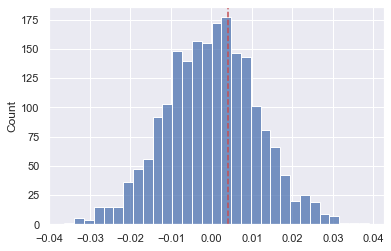

In [60]:
sns.histplot(title_diff_sample)
plt.axvline(title_diff, 0, 1, color='r', linestyle='--')
plt.show()

In [70]:
print('Values more extreme than observed:', sum([el >= title_diff for el in title_diff_sample]))
p_value = sum([el > title_diff for el in title_diff_sample])/n
print('p-value:', p_value)

Values more extreme than observed: 709
p-value: 0.3545


In [71]:
alpha = 0.05
if p_value <= alpha: 
    print('p-value <= alpha | the observed result is statistically significant | H0 rejected')
else: 
    print('p-value > alpha | the observed result is not statistically significant | H0 accepted')

p-value > alpha | the observed result is not statistically significant | H0 accepted


2. Run a hypothesis test (choose the one you prefer) to figure out whether the "article_test" receaved a higher number of `clicked_article`than the "article_control" group. 

3. Come up with your own AB test and, after designing the experiment: 
    1. use an appropriate probability distribution to create a synthetic dataset that supports your experiment (create your own fake data); 
    2. using a permutation test, run an hypothesis test and state your conclusions (you will already know the result from step 1 of course). 